In [90]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [16]:
df = pd.read_csv('HRDataset_v13.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [17]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 401 строк и 35 столбца.


# 1. Обработка пропусков в данных

In [18]:
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

Employee_Name - 91 - 22.693. Тип - object
EmpID - 91 - 22.693. Тип - float64
MarriedID - 91 - 22.693. Тип - float64
MaritalStatusID - 91 - 22.693. Тип - float64
GenderID - 91 - 22.693. Тип - float64
EmpStatusID - 91 - 22.693. Тип - float64
DeptID - 91 - 22.693. Тип - float64
PerfScoreID - 91 - 22.693. Тип - float64
FromDiversityJobFairID - 91 - 22.693. Тип - float64
PayRate - 91 - 22.693. Тип - float64
Termd - 91 - 22.693. Тип - float64
PositionID - 91 - 22.693. Тип - float64
Position - 91 - 22.693. Тип - object
State - 91 - 22.693. Тип - object
Zip - 91 - 22.693. Тип - float64
DOB - 91 - 22.693. Тип - object
Sex - 91 - 22.693. Тип - object
MaritalDesc - 91 - 22.693. Тип - object
CitizenDesc - 91 - 22.693. Тип - object
HispanicLatino - 91 - 22.693. Тип - object
RaceDesc - 91 - 22.693. Тип - object
DateofHire - 91 - 22.693. Тип - object
DateofTermination - 298 - 74.314. Тип - object
TermReason - 92 - 22.943. Тип - object
EmploymentStatus - 91 - 22.693. Тип - object
Department - 91 - 22.

## 1.1 Удаление пустых значений 

In [19]:
# удаление строк с пустыми значениями Employee_Name
df = df[df['Employee_Name'].notna()]

# удаление столбца company
df.drop(columns=['LastPerformanceReview_Date'], inplace=True)

In [21]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 310 строк и 34 столбца.


## 1.2 Заполнение нулями

In [22]:
df['DaysLateLast30'] = df['DaysLateLast30'].fillna(0)

In [58]:
df[df['DaysLateLast30'].isnull()].shape

(0, 34)

## 1.3 Внедрение значений в числовых данных 

In [97]:
df_2 = pd.read_csv('restaurant-scores-lives-standard.csv')
df_2.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


In [104]:
row_number_2 = df_2.shape[0]
column_number_2 = df_2.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 10692 строк и 13 столбца.


In [105]:
for col in df_2.columns:
    null_count = df_2[df_2[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df_2[col].dtype
        percent = round((null_count / row_number_2) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

business_postal_code - 1083 - 2.007. Тип - object
business_latitude - 24095 - 44.643. Тип - float64
business_longitude - 24095 - 44.643. Тип - float64
business_location - 24095 - 44.643. Тип - object
business_phone_number - 36539 - 67.699. Тип - float64
inspection_score - 14114 - 26.15. Тип - float64
violation_id - 13462 - 24.942. Тип - object
violation_description - 13462 - 24.942. Тип - object
risk_category - 13462 - 24.942. Тип - object
inspection_score_MinMax - 14114 - 26.15. Тип - float64
inspection_score_Z - 14114 - 26.15. Тип - float64


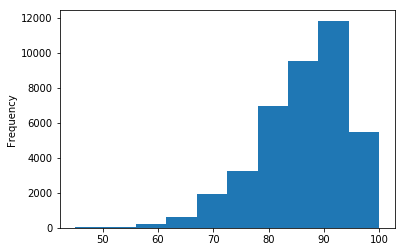

In [106]:
df_2['inspection_score'].plot.hist()

In [107]:
df_2['inspection_score'].describe()

count    39859.000000
mean        86.235254
std          8.480003
min         45.000000
25%         81.000000
50%         88.000000
75%         92.000000
max        100.000000
Name: inspection_score, dtype: float64

In [108]:
mode = df_2['inspection_score'].mode()[0]

In [109]:
(df_2[df_2['inspection_score'] == mode].shape[0]/row_number_2) * 100

7.025735089767106

In [110]:
median = df_2['inspection_score'].describe()['50%']
(df_2[df_2['inspection_score'] == median].shape[0]/row_number_2) * 100

4.861690104311415

In [111]:
imp = SimpleImputer(strategy='most_frequent')
df_2['inspection_score'] = imp.fit_transform(df_2[['inspection_score']])

In [112]:
df_2[df_2['inspection_score'].isnull()].shape

(0, 19)

## 1.4 Внедрение значений в категориальных данных

In [27]:
imp = SimpleImputer(strategy='most_frequent')
df['ManagerID'] = imp.fit_transform(df[['ManagerID']])

In [57]:
df[df['ManagerID'].isnull()].shape

(0, 34)

# 2. Кодирование категориальных признаков

In [62]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

Employee_Name
Position
State
DOB
Sex
MaritalDesc
CitizenDesc
HispanicLatino
RaceDesc
DateofHire
DateofTermination
TermReason
EmploymentStatus
Department
ManagerName
RecruitmentSource
PerformanceScore


## 2.1 Кодирование категорий целочисленными значениями

In [64]:
df['Sex'].unique()

array(['F', 'M '], dtype=object)

In [74]:
le = LabelEncoder()
df['Sex_LabelEncoder'] = le.fit_transform(df['Sex'])

In [69]:
np.unique(cat_enc_le)

array([0, 1])

In [71]:
le.inverse_transform([0, 1])

array(['F', 'M '], dtype=object)

In [75]:
df[['Sex','Sex_LabelEncoder']].head()

,Sex,Sex_LabelEncoder
0,F,0
1,M,1
2,M,1
3,F,0
4,F,0


## 2.2. Кодирование категорий наборами бинарных значений 

In [76]:
df['Position'].unique()

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Architect',
       'Database Administrator', 'Data Analyst', 'Data Analyst ',
       'Director of Operations', 'Director of Sales', 'IT Director',
       'IT Manager - DB', 'IT Manager - Infra', 'IT Manager - Support',
       'IT Support', 'Network Engineer', 'President & CEO',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Enterprise Architect', 'Principal Data Architect',
       'Sr. Network Engineer'], dtype=object)

In [82]:
ohe = OneHotEncoder()
transformed_data = ohe.fit_transform(df[['Position']])

In [83]:
transformed_data.shape

(310, 32)

In [85]:
transformed_data.todense()[0:10]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 

## 2.3 Pandas get_dummies

In [86]:
pd.get_dummies(df['Position']).head()

,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Analyst,Data Analyst,Data Architect,Database Administrator,...,Production Technician I,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
pd.get_dummies(df['Position'], dummy_na=True).head()

,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Analyst,Data Analyst,Data Architect,Database Administrator,...,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer,NaN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Масштабирование данных

## 3.1 MinMax масштабирование 

<img src="minmax.png">

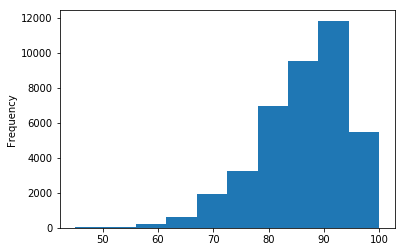

In [98]:
df_2['inspection_score'].plot.hist()

In [99]:
sc1 = MinMaxScaler()
df_2['inspection_score_MinMax'] = sc1.fit_transform(df_2[['inspection_score']])

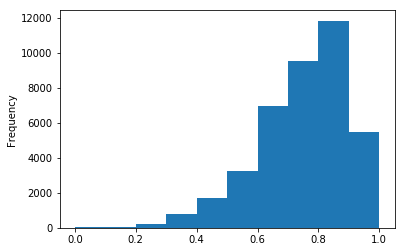

In [100]:
df_2['inspection_score_MinMax'].plot.hist()

## 3.2 Масштабирование данных на основе Z-оценки 

<img src="z.png">

In [101]:
sc2 = StandardScaler()
df_2['inspection_score_Z'] = sc2.fit_transform(df_2[['inspection_score']])

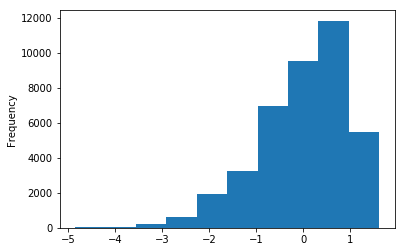

In [102]:
df_2['inspection_score_Z'].plot.hist()

## 3.3. Нормализация данных

In [113]:
sc3 = Normalizer()
df_2['inspection_score_Norm'] = sc3.fit_transform(df_2[['inspection_score']])

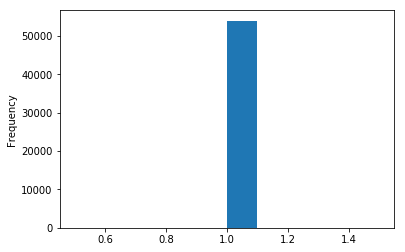

In [114]:
df_2['inspection_score_Norm'].plot.hist()